In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('../input/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T #dev set
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T #train set
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape
# data_train.shape
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [3]:
Y_train.shape

(41000,)

In [4]:
def init_params():
    W1 = np.random.rand(24, 784) - 0.5
    b1 = np.random.rand(24, 1) - 0.5
    W2 = np.random.rand(10, 24) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):#will store probability of image being every digit
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):#you can google it to know in detail
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2



In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
#             print(Y)
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.30, 700)

Iteration:  0
[6 6 4 ... 4 4 3] [7 1 0 ... 4 2 6]
0.0893170731707317
Iteration:  10
[1 1 0 ... 4 6 6] [7 1 0 ... 4 2 6]
0.4817560975609756
Iteration:  20
[1 1 0 ... 4 6 6] [7 1 0 ... 4 2 6]
0.6454878048780488
Iteration:  30
[1 1 0 ... 4 6 6] [7 1 0 ... 4 2 6]
0.7216585365853658
Iteration:  40
[1 1 0 ... 4 6 6] [7 1 0 ... 4 2 6]
0.7639024390243903
Iteration:  50
[7 1 0 ... 4 6 6] [7 1 0 ... 4 2 6]
0.7902439024390244
Iteration:  60
[7 1 0 ... 4 2 6] [7 1 0 ... 4 2 6]
0.8074634146341464
Iteration:  70
[7 1 0 ... 4 2 6] [7 1 0 ... 4 2 6]
0.8196341463414634
Iteration:  80
[7 1 0 ... 4 2 6] [7 1 0 ... 4 2 6]
0.8300243902439024
Iteration:  90
[7 1 0 ... 4 2 6] [7 1 0 ... 4 2 6]
0.8387317073170731
Iteration:  100
[7 1 0 ... 4 2 6] [7 1 0 ... 4 2 6]
0.8449756097560975
Iteration:  110
[7 1 0 ... 4 2 6] [7 1 0 ... 4 2 6]
0.85
Iteration:  120
[7 1 0 ... 4 2 6] [7 1 0 ... 4 2 6]
0.8553170731707317
Iteration:  130
[7 1 0 ... 4 2 6] [7 1 0 ... 4 2 6]
0.8598292682926829
Iteration:  140
[7 1 0 ... 4 2 

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


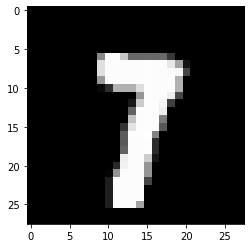

Prediction:  [1]
Label:  1


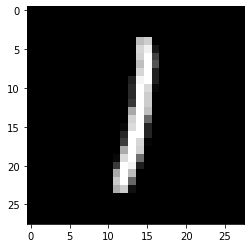

Prediction:  [0]
Label:  0


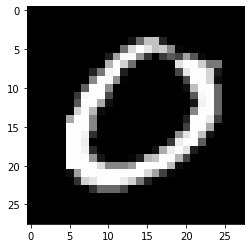

Prediction:  [8]
Label:  8


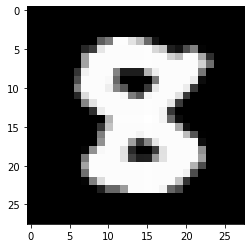

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 7 1 6 2 2 1 1 0 9 7 1 6 1 3 2 6 3 1 6 8 6 9 8 0 8 0 4 8 3 0 5 0 1 7 6 1
 8 2 7 1 6 4 2 0 3 8 0 1 5 9 0 2 0 5 0 0 5 0 9 1 9 7 9 5 8 4 2 4 1 0 3 7 7
 6 2 3 0 0 7 7 0 5 5 3 9 0 0 4 8 1 4 4 3 7 4 1 0 1 7 9 4 1 1 0 7 0 6 1 9 3
 4 9 0 1 9 1 6 6 3 3 4 4 1 2 6 5 3 7 5 7 4 1 7 4 7 2 8 3 3 2 4 2 5 7 4 1 9
 7 1 7 4 1 5 9 7 1 6 3 0 6 3 8 5 6 8 6 1 7 0 8 5 5 0 7 5 7 8 9 8 7 6 4 0 3
 5 5 9 5 7 2 3 5 5 7 0 7 1 3 6 7 5 8 4 4 2 5 1 1 6 4 9 5 1 1 5 4 9 5 4 3 4
 2 5 7 9 5 5 7 9 3 7 7 5 9 7 5 2 6 4 9 3 9 9 0 3 2 0 6 3 1 2 6 3 4 9 9 7 4
 9 8 2 9 9 1 1 0 2 5 7 1 2 1 0 3 1 3 5 1 8 8 0 8 2 7 3 6 0 6 3 2 3 7 8 2 3
 2 9 7 3 6 1 5 6 7 9 1 4 7 9 2 1 1 8 2 1 7 2 4 8 3 8 9 5 0 1 0 7 7 3 1 4 1
 1 4 6 3 1 5 3 3 6 5 7 2 7 4 4 8 3 2 8 7 5 0 2 0 7 8 7 3 4 4 0 9 1 5 1 4 8
 9 8 2 2 8 8 6 2 7 3 6 3 0 3 7 6 2 0 6 9 1 5 5 6 0 7 8 3 9 0 1 0 5 8 7 6 7
 1 0 7 0 1 2 6 3 3 3 6 1 3 7 9 2 4 8 2 8 4 1 7 0 5 2 5 3 6 6 4 8 9 3 6 2 0
 3 2 7 9 7 0 5 3 8 4 6 2 7 5 8 9 8 9 0 0 1 1 0 2 1 0 1 6 4 0 9 5 2 5 9 7 7
 9 9 1 1 9 5 8 4 9 5 4 0 

0.923